In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import dotenv
from dotenv import load_dotenv


In [71]:
import os
import sys
import json
import pandas as pd
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# Get the file path from the environment variable
file_path = os.getenv('WORK_DIR')
if file_path is None:
    raise ValueError("File path not defined in .env")

# Initialize an empty list to store the data
data = []

# Open the file and load each line as a JSON object
try:
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            # Try to parse each line as JSON
            try:
                data.append(json.loads(line))
            except json.JSONDecodeError as e:
                print(f"Error decoding line: {e}")
except FileNotFoundError as e:
    print(f"File not found: {e}")

# Convert the list of dictionaries into a DataFrame
if data:
    df = pd.DataFrame(data)
    df_raw=df.copy()
    # Display the first few rows of the DataFrame
    print(df.head())
else:
    print("No data loaded into the DataFrame.")


                                      seller_address            warranty  \
0  {'comment': '', 'longitude': -58.3986709, 'id'...                None   
1  {'comment': '', 'longitude': -58.5059173, 'id'...  NUESTRA REPUTACION   
2  {'comment': '', 'longitude': -58.4143948, 'id'...                None   
3  {'comment': '', 'longitude': -58.4929208, 'id'...                None   
4  {'comment': '', 'longitude': -58.5495042, 'id'...      MI REPUTACION.   

  sub_status condition seller_contact deal_ids  base_price  \
0         []       new           None       []        80.0   
1         []      used           None       []      2650.0   
2         []      used           None       []        60.0   
3         []       new           None       []       580.0   
4         []      used           None       []        30.0   

                                            shipping  \
0  {'local_pick_up': True, 'methods': [], 'tags':...   
1  {'local_pick_up': True, 'methods': [], 'tags':...   
2 

In [74]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [75]:
# Dimensiones del DataFrame (número de filas y columnas)
df.shape


(100000, 48)

In [76]:
# Nombres de las columnas
df.columns

Index(['seller_address', 'warranty', 'sub_status', 'condition',
       'seller_contact', 'deal_ids', 'base_price', 'shipping',
       'non_mercado_pago_payment_methods', 'seller_id', 'variations',
       'location', 'site_id', 'listing_type_id', 'price', 'attributes',
       'buying_mode', 'tags', 'listing_source', 'parent_item_id',
       'coverage_areas', 'category_id', 'descriptions', 'last_updated',
       'international_delivery_mode', 'pictures', 'id', 'official_store_id',
       'differential_pricing', 'accepts_mercadopago', 'original_price',
       'currency_id', 'thumbnail', 'title', 'automatic_relist', 'date_created',
       'secure_thumbnail', 'stop_time', 'status', 'video_id',
       'catalog_product_id', 'subtitle', 'initial_quantity', 'start_time',
       'permalink', 'geolocation', 'sold_quantity', 'available_quantity'],
      dtype='object')

In [77]:
# Resumen general del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 48 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   seller_address                    100000 non-null  object 
 1   warranty                          39104 non-null   object 
 2   sub_status                        100000 non-null  object 
 3   condition                         100000 non-null  object 
 4   seller_contact                    2219 non-null    object 
 5   deal_ids                          100000 non-null  object 
 6   base_price                        100000 non-null  float64
 7   shipping                          100000 non-null  object 
 8   non_mercado_pago_payment_methods  100000 non-null  object 
 9   seller_id                         100000 non-null  int64  
 10  variations                        100000 non-null  object 
 11  location                          100000 non-null  ob

In [78]:
# Estadísticas descriptivas para columnas numéricas
df.describe()

,base_price,seller_id,price,official_store_id,original_price,catalog_product_id,initial_quantity,sold_quantity,available_quantity
count,1.000000e+05,1.000000e+05,1.000000e+05,818.000000,143.000000,1.100000e+01,100000.000000,100000.000000,100000.000000
mean,5.252423e+04,8.425269e+07,5.252433e+04,206.443765,1593.341958,3.727643e+06,35.093370,2.396990,34.842380
std,8.623127e+06,5.497257e+07,8.623127e+06,128.252953,2245.798072,1.884698e+06,421.076196,42.685077,420.808403
min,8.400000e-01,1.304000e+03,8.400000e-01,1.000000,120.000000,9.440400e+04,1.000000,0.000000,1.000000
25%,9.000000e+01,3.953591e+07,9.000000e+01,84.000000,449.000000,3.050702e+06,1.000000,0.000000,1.000000
50%,2.500000e+02,7.631063e+07,2.500000e+02,216.000000,858.000000,5.093232e+06,1.000000,0.000000,1.000000
75%,8.000000e+02,1.325659e+08,8.000000e+02,312.750000,1500.000000,5.103216e+06,2.000000,0.000000,2.000000
max,2.222222e+09,1.946906e+08,2.222222e+09,446.000000,13999.000000,5.434513e+06,9999.000000,8676.000000,9999.000000


In [79]:
df.head(5)

,seller_address,warranty,sub_status,condition,seller_contact,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,seller_id,variations,location,site_id,listing_type_id,price,attributes,buying_mode,tags,listing_source,parent_item_id,coverage_areas,category_id,descriptions,last_updated,international_delivery_mode,pictures,id,official_store_id,differential_pricing,accepts_mercadopago,original_price,currency_id,thumbnail,title,automatic_relist,date_created,secure_thumbnail,stop_time,status,video_id,catalog_product_id,subtitle,initial_quantity,start_time,permalink,geolocation,sold_quantity,available_quantity
0,"{'comment': '', 'longitude': -58.3986709, 'id'...",None,[],new,None,[],80.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",74952096,[],{},MLA,bronze,80.0,[],buy_it_now,[dragged_bids_and_visits],,MLA568261029,[],MLA126406,[{'id': 'MLA578052519-912855983'}],2015-09-05T20:42:58.000Z,none,"[{'size': '500x375', 'secure_url': 'https://a2...",MLA578052519,NaN,None,True,NaN,ARS,http://mla-s1-p.mlstatic.com/5386-MLA435206787...,Auriculares Samsung Originales Manos Libres Ca...,False,2015-09-05T20:42:53.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,2015-11-04T20:42:53.000Z,active,None,NaN,None,1,2015-09-05T20:42:53.000Z,http://articulo.mercadolibre.com.ar/MLA-578052...,"{'latitude': -34.6280698, 'longitude': -58.398...",0,1
1,"{'comment': '', 'longitude': -58.5059173, 'id'...",NUESTRA REPUTACION,[],used,None,[],2650.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",42093335,[],{},MLA,silver,2650.0,[],buy_it_now,[],,MLA561574487,[],MLA10267,[{'id': 'MLA581565358-930764806'}],2015-09-26T18:08:34.000Z,none,"[{'size': '499x334', 'secure_url': 'https://a2...",MLA581565358,NaN,None,True,NaN,ARS,http://mla-s1-p.mlstatic.com/23223-MLA20245018...,Cuchillo Daga Acero Carbón Casco Yelmo Solinge...,False,2015-09-26T18:08:30.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,2015-11-25T18:08:30.000Z,active,None,NaN,None,1,2015-09-26T18:08:30.000Z,http://articulo.mercadolibre.com.ar/MLA-581565...,"{'latitude': -34.5935524, 'longitude': -58.505...",0,1
2,"{'comment': '', 'longitude': -58.4143948, 'id'...",None,[],used,None,[],60.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",133384258,[],{},MLA,bronze,60.0,[],buy_it_now,[dragged_bids_and_visits],,MLA568881256,[],MLA1227,[{'id': 'MLA578780872-916478256'}],2015-09-09T23:57:10.000Z,none,"[{'size': '375x500', 'secure_url': 'https://a2...",MLA578780872,NaN,None,True,NaN,ARS,http://mla-s1-p.mlstatic.com/22076-MLA20223367...,"Antigua Revista Billiken, N° 1826, Año 1954",False,2015-09-09T23:57:07.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,2015-11-08T23:57:07.000Z,active,None,NaN,None,1,2015-09-09T23:57:07.000Z,http://articulo.mercadolibre.com.ar/MLA-578780...,"{'latitude': -34.6233907, 'longitude': -58.414...",0,1
3,"{'comment': '', 'longitude': -58.4929208, 'id'...",None,[],new,None,[],580.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",143001605,[],{},MLA,silver,580.0,[],buy_it_now,[],,None,[],MLA86345,[{'id': 'MLA581877385-932309698'}],2015-10-05T16:03:50.306Z,none,"[{'size': '441x423', 'secure_url': 'https://a2...",MLA581877385,NaN,None,True,NaN,ARS,http://mla-s2-p.mlstatic.com/183901-MLA2043288...,Alarma Guardtex Gx412 Seguridad Para El Automo...,False,2015-09-28T18:47:56.000Z,https://a248.e.akamai.net/mla-s2-p.mlstatic.co...,2015-12-04T01:13:16.000Z,active,None,NaN,None,1,2015-09-28T18:47:56.000Z,http://articulo.mercadolibre.com.ar/MLA-581877...,"{'latitude': -34.6281894, 'longitude': -58.492...",0,1
4,"{'comment': '', 'longitude': -58.5495042, 'id'...",MI REPUTACION.,[],used,None,[],30.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",96873449,[],{},MLA,bronze,30.0,[],buy_it_now,[dragge

In [80]:
# Función para revisar si el tipo de dato es un diccionario en las primeras filas
def check_dict_columns(df):
    possible_json_columns = []
    for col in df.columns:
        # Si cualquier valor en las primeras 10 filas de la columna es un diccionario
        if df[col].apply(lambda x: isinstance(x, dict)).any():
            possible_json_columns.append(col)
    return possible_json_columns

# Revisar qué columnas contienen diccionarios
json_columns = check_dict_columns(df)
print("Columnas que contienen diccionarios o datos JSON anidados:", json_columns)

Columnas que contienen diccionarios o datos JSON anidados: ['seller_address', 'seller_contact', 'shipping', 'location', 'geolocation']


In [81]:
# Lista de columnas que contienen diccionarios identificadas previamente
json_columns = ['seller_address', 'seller_contact', 'shipping', 'location', 'geolocation']

# Expandir cada una de esas columnas usando pd.json_normalize
for col in json_columns:
    try:
        # Normalizamos la columna que contiene JSON
        expanded_cols = pd.json_normalize(df[col])
        
        # Añadimos un prefijo con el nombre de la columna original para que las nuevas columnas no tengan nombres duplicados
        expanded_cols = expanded_cols.add_prefix(f'{col}_')
        
        # Concatenamos las nuevas columnas expandidas al DataFrame original
        df = pd.concat([df, expanded_cols], axis=1)
        
        # Eliminamos la columna original que contenía los datos JSON
        df.drop(columns=[col], inplace=True)
        
    except Exception as e:
        print(f"Error al procesar {col}: {e}")

# Ver las primeras filas del DataFrame después de la expansión
print(df.head())


             warranty sub_status condition deal_ids  base_price  \
0                None         []       new       []        80.0   
1  NUESTRA REPUTACION         []      used       []      2650.0   
2                None         []      used       []        60.0   
3                None         []       new       []       580.0   
4      MI REPUTACION.         []      used       []        30.0   

                    non_mercado_pago_payment_methods  seller_id variations  \
0  [{'description': 'Transferencia bancaria', 'id...   74952096         []   
1  [{'description': 'Transferencia bancaria', 'id...   42093335         []   
2  [{'description': 'Transferencia bancaria', 'id...  133384258         []   
3  [{'description': 'Transferencia bancaria', 'id...  143001605         []   
4  [{'description': 'Transferencia bancaria', 'id...   96873449         []   

  site_id listing_type_id   price attributes buying_mode  \
0     MLA          bronze    80.0         []  buy_it_now   
1     ML

In [82]:
# Resumen general del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 91 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   warranty                                          39104 non-null   object 
 1   sub_status                                        100000 non-null  object 
 2   condition                                         100000 non-null  object 
 3   deal_ids                                          100000 non-null  object 
 4   base_price                                        100000 non-null  float64
 5   non_mercado_pago_payment_methods                  100000 non-null  object 
 6   seller_id                                         100000 non-null  int64  
 7   variations                                        100000 non-null  object 
 8   site_id                                           100000 non-null  object 
 9   listi

In [83]:
# Estadísticas descriptivas para columnas numéricas
df.describe()

,base_price,seller_id,price,official_store_id,original_price,catalog_product_id,initial_quantity,sold_quantity,available_quantity
count,1.000000e+05,1.000000e+05,1.000000e+05,818.000000,143.000000,1.100000e+01,100000.000000,100000.000000,100000.000000
mean,5.252423e+04,8.425269e+07,5.252433e+04,206.443765,1593.341958,3.727643e+06,35.093370,2.396990,34.842380
std,8.623127e+06,5.497257e+07,8.623127e+06,128.252953,2245.798072,1.884698e+06,421.076196,42.685077,420.808403
min,8.400000e-01,1.304000e+03,8.400000e-01,1.000000,120.000000,9.440400e+04,1.000000,0.000000,1.000000
25%,9.000000e+01,3.953591e+07,9.000000e+01,84.000000,449.000000,3.050702e+06,1.000000,0.000000,1.000000
50%,2.500000e+02,7.631063e+07,2.500000e+02,216.000000,858.000000,5.093232e+06,1.000000,0.000000,1.000000
75%,8.000000e+02,1.325659e+08,8.000000e+02,312.750000,1500.000000,5.103216e+06,2.000000,0.000000,2.000000
max,2.222222e+09,1.946906e+08,2.222222e+09,446.000000,13999.000000,5.434513e+06,9999.000000,8676.000000,9999.000000


In [84]:
# Análisis descriptivo de variables numéricas
numeric_cols = ['base_price', 'price', 'initial_quantity', 'sold_quantity', 'available_quantity']

In [85]:
# Resumen estadístico
print(df[numeric_cols].describe())

         base_price         price  initial_quantity  sold_quantity  \
count  1.000000e+05  1.000000e+05     100000.000000  100000.000000   
mean   5.252423e+04  5.252433e+04         35.093370       2.396990   
std    8.623127e+06  8.623127e+06        421.076196      42.685077   
min    8.400000e-01  8.400000e-01          1.000000       0.000000   
25%    9.000000e+01  9.000000e+01          1.000000       0.000000   
50%    2.500000e+02  2.500000e+02          1.000000       0.000000   
75%    8.000000e+02  8.000000e+02          2.000000       0.000000   
max    2.222222e+09  2.222222e+09       9999.000000    8676.000000   

       available_quantity  
count       100000.000000  
mean            34.842380  
std            420.808403  
min              1.000000  
25%              1.000000  
50%              1.000000  
75%              2.000000  
max           9999.000000  


In [86]:
# Reemplazar valores faltantes en 'base_price' con los de 'price'
df['base_price'] = df['base_price'].fillna(df['price'])

In [ ]:
# Aplicar transformación logarítmica a las variables numéricas
for col in numeric_cols:
    df[col + '_log'] = np.log(df[col] + 1)  # Suma 1 para evitar el logaritmo de 0

# Eliminar las columnas originales si no se necesitan
df.drop(columns=numeric_cols, inplace=True)

In [88]:
# Análisis descriptivo de variables categóricas
categorical_cols = ['condition', 'buying_mode', 'shipping_mode']

# Frecuencia de cada categoría
for col in categorical_cols:
    print(f'Frecuencias de {col}:\n{df[col].value_counts()}\n')

Frecuencias de condition:
condition
new     53758
used    46242
Name: count, dtype: int64

Frecuencias de buying_mode:
buying_mode
buy_it_now    97001
classified     2219
auction         780
Name: count, dtype: int64

Frecuencias de shipping_mode:
shipping_mode
me2              51255
not_specified    45171
custom            3481
me1                 93
Name: count, dtype: int64



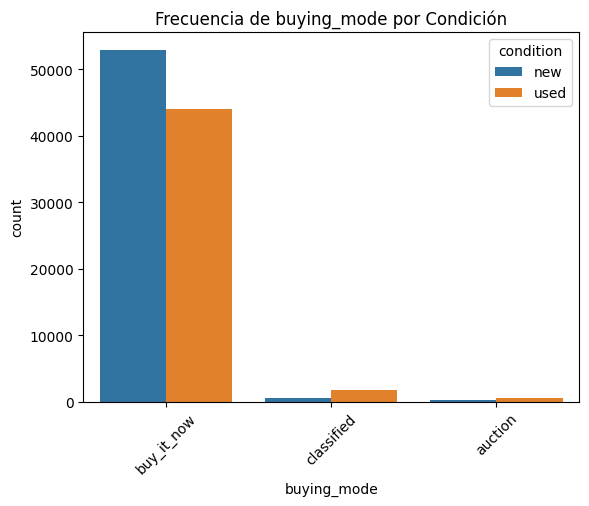

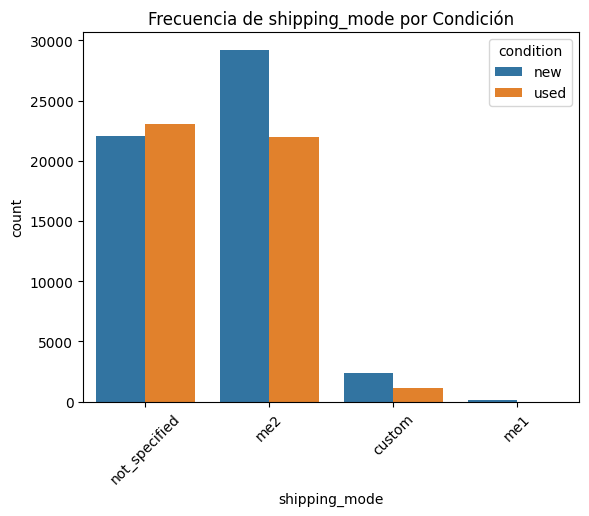

In [89]:
# Relación entre 'condition' y otras variables categóricas
for col in ['buying_mode', 'shipping_mode']:
    sns.countplot(x=col, hue='condition', data=df)
    plt.title(f'Frecuencia de {col} por Condición')
    plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si es necesario
    plt.show()

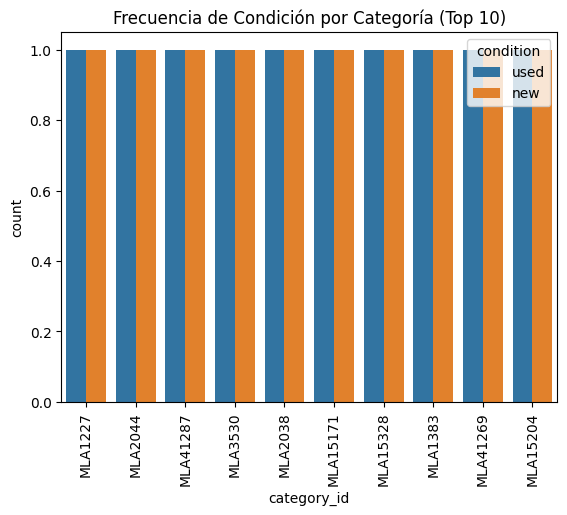

In [90]:
# Agrupar por 'category_id' y contar la frecuencia de cada condición
category_condition_counts = df.groupby('category_id')['condition'].value_counts()

# Obtener las 10 categorías con mayor frecuencia
top_10_categories = category_condition_counts.groupby(level=0).sum().nlargest(10).index

# Filtrar los resultados para mostrar solo las 10 categorías con mayor frecuencia
top_10_category_condition_counts = category_condition_counts[top_10_categories]

# Convertir a DataFrame
top_10_category_condition_counts = top_10_category_condition_counts.reset_index()

# Gráfico de barras
sns.countplot(x='category_id', 
              hue='condition',
              data=top_10_category_condition_counts)
plt.title('Frecuencia de Condición por Categoría (Top 10)')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x 90 grados
plt.show()

La variable category_id no parece ser un predictor útil para la condición del artículo.

Vamos a eliminar todas las columnas que contienen ID en el nombre

In [91]:
df = df.drop(columns=df.filter(like='id').columns)


In [ ]:
# Contar cuántos productos son 'new' y cuántos son 'used'
condition_counts = df['condition'].value_counts()

# Visualización
condition_counts.plot(kind='bar', title='Distribución de la Condición de los Productos')
plt.xlabel('Condición')
plt.ylabel('Cantidad de Productos')
plt.show()


In [93]:
# Ver cuántos valores nulos hay en cada columna
missing_data = df.isnull().sum()

# Mostrar columnas con valores faltantes
print(missing_data[missing_data > 0].sort_values(ascending=False))


differential_pricing          100000
subtitle                      100000
shipping_dimensions            99977
original_price                 99857
seller_contact_webpage         97781
seller_contact_phone2          97781
seller_contact_email           97781
seller_contact_area_code2      97781
location_neighborhood.name     97781
seller_contact_contact         97781
seller_contact_other_info      97781
seller_contact_area_code       97781
seller_contact_phone           97781
location_open_hours            97781
location_address_line          97781
location_longitude             97781
location_city.name             97781
location_country.name          97781
location_latitude              97781
location_zip_code              97781
location_state.name            97781
shipping_free_methods          96994
warranty                       60896
shipping_methods                3008
dtype: int64


In [94]:
# Nombres de las columnas
df.columns

Index(['warranty', 'sub_status', 'condition',
       'non_mercado_pago_payment_methods', 'variations', 'attributes',
       'buying_mode', 'tags', 'listing_source', 'coverage_areas',
       'descriptions', 'last_updated', 'international_delivery_mode',
       'pictures', 'differential_pricing', 'accepts_mercadopago',
       'original_price', 'thumbnail', 'title', 'automatic_relist',
       'date_created', 'secure_thumbnail', 'stop_time', 'status', 'subtitle',
       'start_time', 'permalink', 'seller_address_comment',
       'seller_address_longitude', 'seller_address_address_line',
       'seller_address_latitude', 'seller_address_zip_code',
       'seller_address_country.name',
       'seller_address_search_location.neighborhood.name',
       'seller_address_search_location.state.name',
       'seller_address_search_location.city.name', 'seller_address_city.name',
       'seller_address_state.name', 'seller_contact_area_code2',
       'seller_contact_phone2', 'seller_contact_webpage'

In [95]:
# Convertir columnas de tiempo en formato datetime y calcular días activos
# Convertimos las columnas de fecha y gestionamos los errores automáticamente
df['stop_time'] = pd.to_datetime(df['stop_time'], errors='coerce')
df['start_time'] = pd.to_datetime(df['start_time'], errors='coerce')
df['last_updated'] = pd.to_datetime(df['last_updated'], errors='coerce')

In [96]:
# Calcular los días activos (stop_time - start_time)
df['days_active'] = (df['stop_time'] - df['start_time']).dt.days

df['last_update_days'] = (df['last_updated'] - df['start_time']).dt.days  # Días desde la última actualización

In [97]:
# Verificar el tipo de datos de las columnas convertidas
print(df.dtypes[['stop_time', 'start_time', 'last_updated']])

print(df.dtypes[['days_active', 'last_update_days']])

# Revisa las primeras filas para asegurarte de que los valores tienen sentido
print(df[['days_active', 'last_update_days']].head())


stop_time       datetime64[ns, UTC]
start_time      datetime64[ns, UTC]
last_updated    datetime64[ns, UTC]
dtype: object
days_active         int64
last_update_days    int64
dtype: object
   days_active  last_update_days
0           60                 0
1           60                 0
2           60                 0
3           66                 6
4           60                 3


In [98]:
# Eliminar las columnas de tiempo originales (stop_time, start_time, last_updated)
df.drop(columns=['stop_time', 'start_time', 'last_updated'], inplace=True)

In [100]:
# Nombres de las columnas
df.columns

Index(['warranty', 'sub_status', 'condition',
       'non_mercado_pago_payment_methods', 'variations', 'attributes',
       'buying_mode', 'tags', 'listing_source', 'coverage_areas',
       'descriptions', 'international_delivery_mode', 'pictures',
       'differential_pricing', 'accepts_mercadopago', 'original_price',
       'thumbnail', 'title', 'automatic_relist', 'date_created',
       'secure_thumbnail', 'status', 'subtitle', 'permalink',
       'seller_address_comment', 'seller_address_longitude',
       'seller_address_address_line', 'seller_address_latitude',
       'seller_address_zip_code', 'seller_address_country.name',
       'seller_address_search_location.neighborhood.name',
       'seller_address_search_location.state.name',
       'seller_address_search_location.city.name', 'seller_address_city.name',
       'seller_address_state.name', 'seller_contact_area_code2',
       'seller_contact_phone2', 'seller_contact_webpage',
       'seller_contact_email', 'seller_contact_c

In [101]:
# Eliminar múltiples columnas innecesarias
columns_to_drop = [
     'permalink', 'geolocation_latitude', 'geolocation_longitude', 
    'seller_address_address_line', 'secure_thumbnail', 'date_created',
    'thumbnail', 'title', 'shipping_tags', 'shipping_methods',
    'seller_address_state.name', 'seller_address_zip_code', 'seller_address_comment',
    'descriptions', 'coverage_areas', 'listing_source', 'location', 
    'attributes', 'international_delivery_mode', 'shipping_free_methods', 
    'differential_pricing', 'shipping_dimensions', 
    'seller_address_search_location.neighborhood.name', 'seller_address_country.name', 
    'seller_address_search_location.state.name', 'seller_address_search_location.city.name',
    'seller_address_city.name', 'subtitle', 'non_mercado_pago_payment_methods','pictures'
]

# Eliminar las columnas especificadas
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

In [ ]:
# Convertir las columnas categóricas a booleanas
categorical_cols = ['condition', 'buying_mode', 'shipping_mode']

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [107]:
# Convertir 'warranty' a boolean
df['warranty'] = df['warranty'].notna()

# Convertir 'tags' a boolean
df['tags'] = df['tags'].apply(lambda x: True if isinstance(x, list) and len(x) > 0 else False)

# Estándarizar la columna 'status'
df['status'] = df['status'].apply(lambda x: 'active' if x == 'active' else 'no_active')

# Convertir 'variations' a boolean
df['variations'] = df['variations'].apply(lambda x: True if isinstance(x, list) and len(x) > 0 else False)

In [122]:
# Nombres de las columnas
df.columns

Index(['warranty', 'variations', 'tags', 'accepts_mercadopago',
       'original_price', 'automatic_relist', 'status',
       'seller_address_longitude', 'seller_address_latitude',
       'shipping_local_pick_up', 'shipping_free_shipping', 'base_price_log',
       'price_log', 'initial_quantity_log', 'sold_quantity_log',
       'available_quantity_log', 'days_active', 'last_update_days',
       'condition_used', 'buying_mode_buy_it_now', 'buying_mode_classified',
       'shipping_mode_me1', 'shipping_mode_me2', 'shipping_mode_not_specified',
       'sub_status_0_deleted', 'sub_status_0_expired',
       'sub_status_0_suspended'],
      dtype='object')

In [110]:
# Eliminar las columnas de 'seller_contact'
seller_contact_cols = ['seller_contact_area_code2', 'seller_contact_phone2',
                      'seller_contact_webpage', 'seller_contact_email',
                      'seller_contact_contact', 'seller_contact_area_code',
                      'seller_contact_other_info', 'seller_contact_phone']

df.drop(columns=seller_contact_cols, inplace=True)

# Eliminar las columnas de 'location' que no son de interés
location_cols = ['location_open_hours', 'location_longitude', 
                  'location_address_line', 'location_latitude', 
                  'location_zip_code', 'location_neighborhood.name',
                  'location_country.name', 'location_city.name', 
                  'location_state.name']

df.drop(columns=location_cols, inplace=True)

In [119]:
# Rellenar las listas con un valor de relleno
df['sub_status'] = df['sub_status'].apply(lambda x: x + [None] * (3 - len(x)) if isinstance(x, list) else [x, None, None])

# Crear nuevas columnas para cada elemento de la lista
from pandas.core.arrays.categorical import CategoricalDtype
df = pd.concat([df, pd.DataFrame(df.sub_status.values.tolist(), 
                          columns=['sub_status_' + str(i) for i in range(3)])], axis=1)
df.drop(columns='sub_status', inplace=True)

# Convertir a booleano
df = pd.get_dummies(df, columns=['sub_status_' + str(i) for i in range(3)], drop_first=True)

In [124]:
# Eliminar 'original_price'
df.drop(columns=['original_price'], inplace=True)

# Convertir 'status' a boolean
df['status'] = df['status'].apply(lambda x: True if x == 'active' else False)

In [126]:
def to_numeric_with_handling(value):
    try:
        return float(value)
    except ValueError:
        # Si el valor no es un número válido,  puedes decidir cómo manejarlo:
        # Por ejemplo,  puedes devolver 0,  None,  o un valor específico.
        return 0  # En este caso,  se devolverá 0

df['seller_address_longitude'] = df['seller_address_longitude'].apply(to_numeric_with_handling)
df['seller_address_latitude'] = df['seller_address_latitude'].apply(to_numeric_with_handling)

In [127]:
# Resumen general del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   warranty                     100000 non-null  bool   
 1   variations                   100000 non-null  bool   
 2   tags                         100000 non-null  bool   
 3   accepts_mercadopago          100000 non-null  bool   
 4   automatic_relist             100000 non-null  bool   
 5   status                       100000 non-null  bool   
 6   seller_address_longitude     100000 non-null  float64
 7   seller_address_latitude      100000 non-null  float64
 8   shipping_local_pick_up       100000 non-null  bool   
 9   shipping_free_shipping       100000 non-null  bool   
 10  base_price_log               100000 non-null  float64
 11  price_log                    100000 non-null  float64
 12  initial_quantity_log         100000 non-null  float64
 13  

In [130]:
df.head(5)

,warranty,variations,tags,accepts_mercadopago,automatic_relist,status,seller_address_longitude,seller_address_latitude,shipping_local_pick_up,shipping_free_shipping,base_price_log,price_log,initial_quantity_log,sold_quantity_log,available_quantity_log,days_active,last_update_days,condition_used,buying_mode_buy_it_now,buying_mode_classified,shipping_mode_me1,shipping_mode_me2,shipping_mode_not_specified,sub_status_0_deleted,sub_status_0_expired,sub_status_0_suspended
0,True,False,True,True,False,True,-58.398671,-34.628070,True,False,4.394449,4.394449,0.693147,0.0,0.693147,60,0,False,True,False,False,False,True,False,False,False
1,True,False,False,True,False,True,-58.505917,-34.593552,True,False,7.882692,7.882692,0.693147,0.0,0.693147,60,0,True,True,False,False,True,False,False,False,False
2,True,False,True,True,False,True,-58.414395,-34.623391,True,False,4.110874,4.110874,0.693147,0.0,0.693147,60,0,True,True,False,False,True,False,False,False,False
3,True,False,False,True,False,True,-58.492921,-34.628189,True,False,6.364751,6.364751,0.693147,0.0,0.693147,66,6,False,True,False,False,True,False,False,False,False
4,True,False,True,True,False,True,-58.549504,-34.634655,True,False,3.433987,3.433987,0.693147,0.0,0.693147,60,3,True,True,False,False,False,True,False,False,False


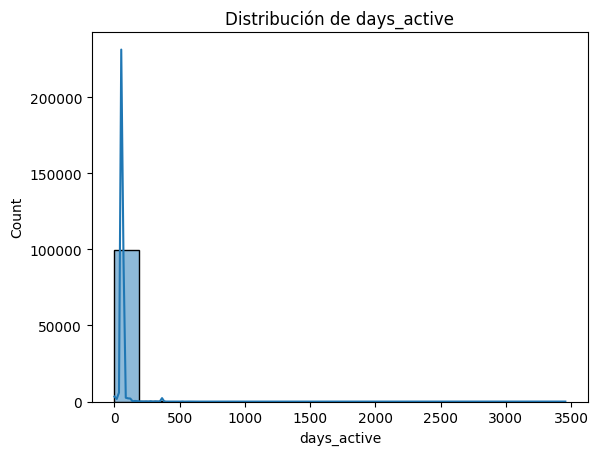

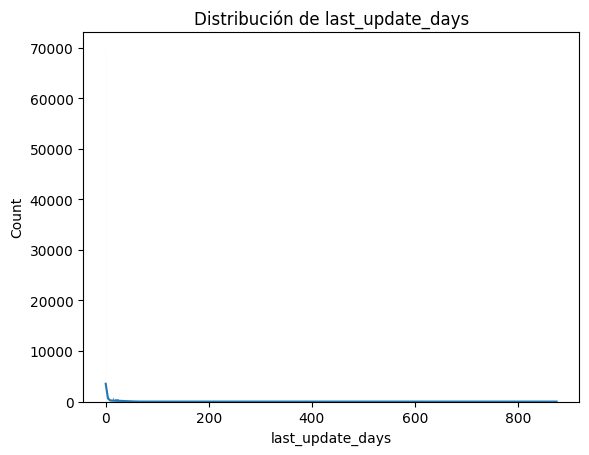

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['days_active', 'last_update_days']

# Generar histogramas
for col in numeric_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.show()

In [136]:
numeric_cols = ['days_active', 'last_update_days']

# Aplicar transformación logarítmica a las variables numéricas
for col in numeric_cols:
    df[col + '_log'] = np.log(df[col] + 1)  # Suma 1 para evitar el logaritmo de 0

# Eliminar las columnas originales si no se necesitan
df.drop(columns=numeric_cols, inplace=True) 

In [138]:
df.drop(columns=numeric_cols, inplace=True) 
# Resumen general del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   warranty                     100000 non-null  bool   
 1   variations                   100000 non-null  bool   
 2   tags                         100000 non-null  bool   
 3   accepts_mercadopago          100000 non-null  bool   
 4   automatic_relist             100000 non-null  bool   
 5   status                       100000 non-null  bool   
 6   seller_address_longitude     100000 non-null  float64
 7   seller_address_latitude      100000 non-null  float64
 8   shipping_local_pick_up       100000 non-null  bool   
 9   shipping_free_shipping       100000 non-null  bool   
 10  base_price_log               100000 non-null  float64
 11  price_log                    100000 non-null  float64
 12  initial_quantity_log         100000 non-null  float64
 13  

In [139]:
df.drop_duplicates(inplace=True)
print(df.shape)

(85296, 26)


In [140]:
df.to_csv("../data/cleaned.csv", index = False)